In [1]:
import numpy as np
import csv
import pandas as pd

#import the training data 
rows = []

with open('traininingdata.txt', 'r') as file:
    csv_reader = csv.reader(file, delimiter=';', quotechar='"')
    for row in csv_reader:
        rows.append(row)

column_names = rows[0]

df = pd.DataFrame(rows[1:], columns=column_names)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes


In [2]:
# Convert object type to numerical type
cols_to_convert = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.942076,1365.055989,15.778534,258.363166,2.769907,39.749889,0.579601
std,10.616610,3098.191637,8.313360,257.188052,3.119367,99.547099,2.384831
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1422.250000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Check for the null value
df.isnull().any().any()

False

In [5]:
# import the testing data
rows = []

with open('testdata.txt', 'r') as file:
    csv_reader = csv.reader(file, delimiter=';', quotechar='"')
    for row in csv_reader:
        rows.append(row)

column_names = rows[0]

df_test = pd.DataFrame(rows[1:], columns=column_names)

df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,housemaid,married,tertiary,no,468,yes,no,unknown,14,may,220,1,-1,0,unknown,no
1,31,management,single,tertiary,no,10215,no,no,cellular,22,aug,139,2,-1,0,unknown,no
2,45,blue-collar,married,primary,no,900,yes,no,unknown,9,jun,213,1,-1,0,unknown,no
3,58,blue-collar,married,primary,no,1231,no,no,unknown,20,jun,21,3,-1,0,unknown,no
4,35,technician,single,tertiary,no,5301,no,no,cellular,21,nov,937,2,-1,0,unknown,yes


In [6]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

In [7]:
df_test['y'] = df_test['y'].replace({'yes': 1, 'no': 0})

In [8]:
target = df['y']
input = df.drop(['y'], axis = 1)

In [9]:
target_test = df_test['y']
input_test  = df_test.drop(['y'], axis = 1)

In [10]:
input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 1.0)

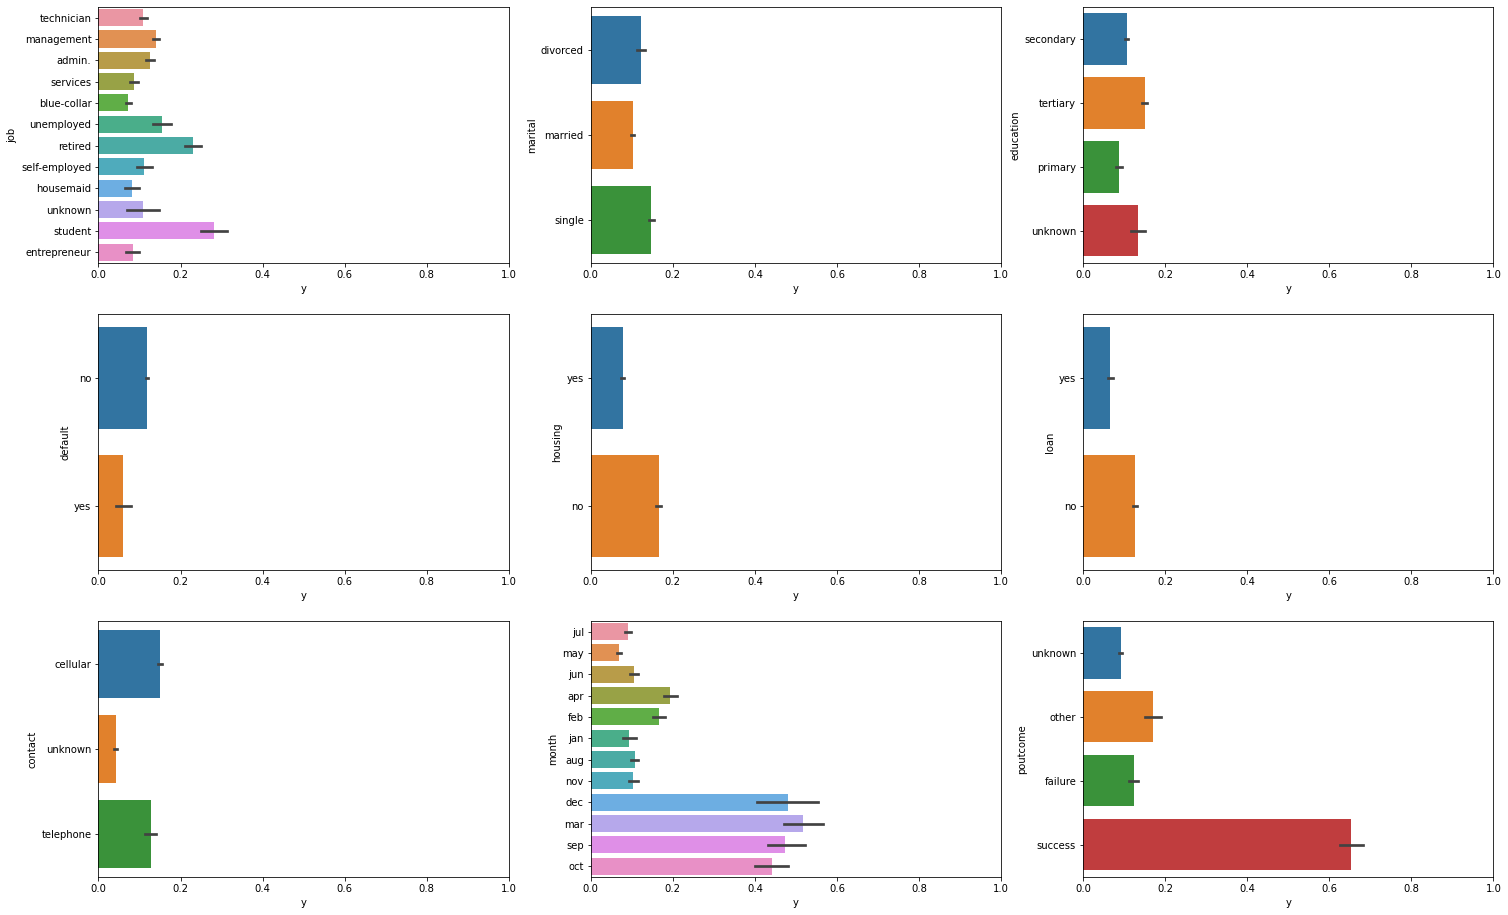

In [12]:
# barplot of each categorical data with target data
fig, ax = plt.subplots(3, 3, figsize=(25, 16))

sns.barplot(
    x = 'y',
    y = 'job',
    data = df,
    ci = 95,
    orient = 'h',
    ax = ax[0][0]
)

ax[0][0].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'marital',
    data = df,
    ci = 95,
    orient = 'h',
    ax = ax[0][1]
)

ax[0][1].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'education',
    data = df,
    ci = 95,
    orient = 'h',
    ax = ax[0][2]
)

ax[0][2].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'default',
    data = df,
    ci = 95,
    orient = 'h',
    ax = ax[1][0]
)

ax[1][0].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'housing',
    data = df,
    ci = 95,
    orient = 'h',
    ax = ax[1][1]
)

ax[1][1].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'loan',
    data = df,
    ci = 95,
    orient = 'h',
    ax = ax[1][2]
)

ax[1][2].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'contact',
    data = df,
    ci = 95,
    orient = 'h',
    ax = ax[2][0]
)

ax[2][0].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'month',
    data = df,
    orient = 'h',
    ci = 95,
    ax = ax[2][1]
)

ax[2][1].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'poutcome',
    data = df,
    ci = 95,
    orient = 'h',
    ax = ax[2][2],
)

ax[2][2].set_xlim(0, 1)

In [13]:
# Get the dummy variables for categorical data and Standardize the numerical data
from sklearn.preprocessing import StandardScaler
input_encoded = pd.get_dummies(input, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

columns_to_scale = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()

input_encoded[columns_to_scale] = scaler.fit_transform(input_encoded[columns_to_scale])

In [14]:
input_encoded

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.099649,-0.465780,1.590410,-0.965700,6.485410,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.853196,-0.406390,-0.093650,0.504062,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.570616,-0.309235,-1.296549,-0.744070,2.959004,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.182931,-0.133323,0.026640,-0.763511,-0.567401,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,-1.030671,-0.323114,1.710700,0.185224,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-1.030671,-0.039396,-0.334230,-0.670193,-0.567401,1.348628,0.176283,0,0,0,...,0,0,0,1,0,0,1,0,0,0
36164,1.795129,-0.385410,0.387510,-0.153054,-0.246819,-0.409359,-0.243040,0,1,0,...,0,0,1,0,0,0,0,0,0,1
36165,0.005456,-0.529044,1.349830,-0.296920,0.073764,-0.409359,-0.243040,0,0,0,...,0,0,1,0,0,0,0,0,0,1
36166,0.382229,-0.407358,1.470120,-0.755734,0.073764,-0.409359,-0.243040,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
input_test_encoded = pd.get_dummies(input_test, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

input_test_encoded[columns_to_scale] = scaler.fit_transform(input_test_encoded[columns_to_scale])

C:\Users\13808\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

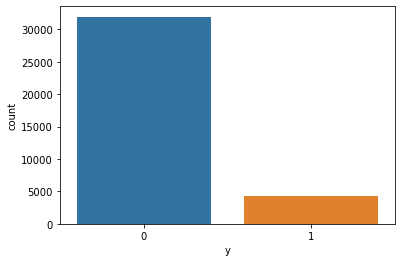

In [16]:
sns.countplot(target)

In [17]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check the original class distribution
print("Original class distribution:", np.bincount(target))

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(input_encoded, target)
print("Class distribution after SMOTE:", np.bincount(y_smote))

# Random oversampling
ros = RandomOverSampler(sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(input_encoded, target)
print("Class distribution after Random OverSampling:", np.bincount(y_ros))

# Undersampling
rus = RandomUnderSampler(sampling_strategy='auto')
X_rus, y_rus = rus.fit_resample(input_encoded, target)
print("Class distribution after Random UnderSampling:", np.bincount(y_rus))

Original class distribution: [31937  4231]
Class distribution after SMOTE: [31937 31937]
Class distribution after Random OverSampling: [31937 31937]
Class distribution after Random UnderSampling: [4231 4231]


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [19]:
# Choose to use the Random oversampling strategy
X_ros

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.099649,-0.465780,1.590410,-0.965700,6.485410,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.853196,-0.406390,-0.093650,0.504062,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.570616,-0.309235,-1.296549,-0.744070,2.959004,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.182931,-0.133323,0.026640,-0.763511,-0.567401,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,-1.030671,-0.323114,1.710700,0.185224,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63869,-1.501637,-0.079420,0.267220,3.128637,-0.567401,-0.409359,-0.243040,0,0,0,...,0,0,1,0,0,0,0,0,0,1
63870,0.664809,-0.043592,-0.454520,-0.347467,-0.567401,1.569632,0.595606,0,1,0,...,0,0,0,1,0,0,0,0,1,0
63871,-1.501637,-0.369916,1.710700,0.776240,-0.567401,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63872,-0.842284,3.616335,-1.777709,1.176730,-0.246819,2.564149,0.595606,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [21]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score, GridSearchCV

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_ros, y_ros, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_ros, y_ros, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_ros, y_ros, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_ros, y_ros, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_ros, y_ros, cv=3)
grad_mean = grad_scores.mean()

# XGBoost Classifier
xgb_clf = XGBClassifier()
grad_scores = cross_val_score(xgb_clf, X_ros, y_ros, cv=3)
xgb_mean = tree_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier()
rand_scores = cross_val_score(rand_clf, X_ros, y_ros, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_ros, y_ros, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_ros, y_ros, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['log_reg', 'svc_clf', 'knn_clf', 'tree_clf', 'grad_clf', 'xgb_clf', 'rand_clf', 'neural_clf', 'nav_clf'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean,xgb_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

C:\Users\13808\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\13808\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\13808\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
6,rand_clf,0.965996
3,tree_clf,0.955350
5,xgb_clf,0.955350
2,knn_clf,0.911623
1,svc_clf,0.885118
4,grad_clf,0.860945
7,neural_clf,0.854323
8,nav_clf,0.854323
0,log_reg,0.831888


In [46]:
# Fit each machine learning algorithms with default value with data resampling
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc_clf', SVC()), 
    ('knn_clf', KNeighborsClassifier()),
    ('tree_clf', tree.DecisionTreeClassifier()),
    ('grad_clf', GradientBoostingClassifier()),
    ('xgb_clf', XGBClassifier()),
    ('rand_clf', RandomForestClassifier()),
    ('neural_clf', MLPClassifier(alpha=1)),
    ('nav_clf', GaussianNB()),
]

results = []

for name, clf in classifiers:
    clf.fit(X_ros, y_ros)
    y_test_pred = clf.predict(input_test_encoded)
    precision = precision_score(target_test, y_test_pred)
    recall = recall_score(target_test, y_test_pred)
    f1 = f1_score(target_test, y_test_pred)
    accuracy = accuracy_score(target_test, y_test_pred)
    
    results.append({
        'Classifier': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })
results_df = pd.DataFrame(results)

print(results_df)

C:\Users\13808\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Classifier  Precision    Recall  F1 Score  Accuracy
0     log_reg   0.413909  0.815690  0.549157  0.843304
1     svc_clf   0.431149  0.858223  0.573957  0.850934
2     knn_clf   0.411142  0.697543  0.517350  0.847728
3    tree_clf   0.473908  0.420605  0.445669  0.877585
4    grad_clf   0.416211  0.863894  0.561770  0.842309
5     xgb_clf   0.484688  0.777883  0.597242  0.877253
6    rand_clf   0.595128  0.484877  0.534375  0.901139
7  neural_clf   0.402030  0.861059  0.548135  0.833905
8     nav_clf   0.356069  0.582231  0.441894  0.827933


In [57]:
# Fit each machine learning algorithms with default value without resampling data.
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc_clf', SVC()), 
    ('knn_clf', KNeighborsClassifier()),
    ('tree_clf', tree.DecisionTreeClassifier()),
    ('grad_clf', GradientBoostingClassifier()),
    ('xgb_clf', XGBClassifier()),
    ('rand_clf', RandomForestClassifier()),
    ('neural_clf', MLPClassifier(alpha=1)),
    ('nav_clf', GaussianNB()),
]

results = []

for name, clf in classifiers:
    clf.fit(input_encoded, target)
    y_test_pred = clf.predict(input_test_encoded)
    precision = precision_score(target_test, y_test_pred)
    recall = recall_score(target_test, y_test_pred)
    f1 = f1_score(target_test, y_test_pred)
    accuracy = accuracy_score(target_test, y_test_pred)
    
    results.append({
        'Classifier': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })
results_df = pd.DataFrame(results)

print(results_df)

C:\Users\13808\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\13808\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Classifier  Precision    Recall  F1 Score  Accuracy
0     log_reg   0.634686  0.325142  0.430000  0.899149
1     svc_clf   0.653501  0.344045  0.450774  0.901913
2     knn_clf   0.614007  0.356333  0.450957  0.898485
3    tree_clf   0.476279  0.483932  0.480075  0.877364
4    grad_clf   0.647147  0.407372  0.500000  0.904678
5     xgb_clf   0.612069  0.469754  0.531551  0.903129
6    rand_clf   0.648438  0.392250  0.488810  0.904014
7  neural_clf   0.622253  0.428166  0.507279  0.902687
8     nav_clf   0.385169  0.505671  0.437270  0.847728


## Better F1 score with resampling data since imbalanced class
## Better accuacy score without resampling data

In [24]:
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rand_clf, param_grid=rand_param_grid, 
                           cv=3, n_jobs=-1, scoring='f1')

grid_search.fit(X_ros, y_ros)

'''

"\nparam_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_features': ['auto', 'sqrt'],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\ngrid_search = GridSearchCV(estimator=rand_clf, param_grid=rand_param_grid, \n                           cv=3, n_jobs=-1, scoring='f1')\n\ngrid_search.fit(X_ros, y_ros)\n\n"

In [25]:
'''
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
'''

'\nbest_parameters = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n'

In [26]:
'''
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rand_clf, input_test_encoded, target_test, cv=3)
'''

'\nfrom sklearn.model_selection import cross_val_predict\n\ny_test_pred = cross_val_predict(rand_clf, input_test_encoded, target_test, cv=3)\n'

In [30]:
'''
rand_forest_pred = RandomForestClassifier().predict(input_test_encoded)
cm = confusion_matrix(target_test, rand_forest_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
'''

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
'''
xgboost_pred = xgb_clf.predict(input_test_encoded)
cm = confusion_matrix(target_test, xgboost_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
'''

In [56]:
params = rand_clf.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [31]:
# Setting up hyperparameter ranges for tuning a Random Forest classifier
n_estimators = list(np.arange(200, 1000, 100))
max_features = ['auto', 'sqrt']
max_depth = list(np.arange(10, 200, 10))
max_depth.append(None)
min_samples_split = list(np.arange(1, 15, 1))
min_samples_leaf = list(np.arange(1, 10, 1))
bootstrap = [True, False]
min_weight_fraction_leaf = list(np.arange(0,1,0.1))

class_weights_1 = [1, 2, 3, 4, 5]
class_weight_grid = [{0: 1, 1: weight} for weight in class_weights_1]
class_weight_grid.append(None)


random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
    'min_weight_fraction_leaf': min_weight_fraction_leaf,
    'class_weight': class_weight_grid
}

print(random_grid)

{'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'bootstrap': [True, False], 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}, None]}


In [47]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rand_clf, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=5101, n_jobs = -1, scoring = 'f1')
rf_random.fit(X_ros, y_ros)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


C:\Users\13808\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\13808\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\13808\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\13808\anaconda3\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "C:\Users\13808\anaconda3

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 2},
                                                         {0: 1, 1: 3},
                                                         {0: 1, 1: 4},
                                                         {0: 1, 1: 5}, None],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2,
                                                                     0.30000000000000004,
                                                                     0.4, 0.5,
                                                                     0.6000000000000001,
                                                                     0.7000000000000001,
                                                                     0.8, 0.9],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900]},
                   random_state=5101, scoring='f1', verbose=2)

In [48]:
# Setting up a Randomized Search with Cross Validation to find the best hyperparameters for the RandomForestClassifier
best_random = rf_random.best_estimator_.fit(X_ros, y_ros)

C:\Users\13808\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [49]:
params = rf_random.best_estimator_.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

bootstrap: False
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 90
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 12
min_weight_fraction_leaf: 0.0
n_estimators: 700
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [50]:
rf_random_pred = best_random.predict(input_test_encoded)

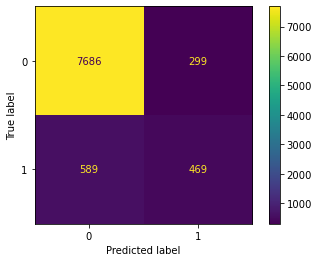

In [51]:
cm = confusion_matrix(target_test, rf_random_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [54]:
print("Precision Score: {:.3f}".format(precision_score(target_test, rf_random_pred)))
print("Recall Score:    {:.3f}".format(recall_score(target_test, rf_random_pred)))
print("F1 Score:        {:.3f}".format(f1_score(target_test, rf_random_pred)))
print("Accuracy Score:  {:.3f}".format(accuracy_score(target_test, rf_random_pred)))

Precision Score: 0.611
Recall Score:    0.443
F1 Score:        0.514
Accuracy Score:  0.902
